##**DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

### **Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###**Import Raw Data**

In [7]:
df = pd.read_csv("/content/blinkit_data.csv")

###**Sample Data**

In [8]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


###**Size of Data**

In [10]:
print("size of data:",df.shape)


size of data: (8523, 12)


###**Field info**

In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

###**Data Types**

In [12]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


###**Data Cleaning**

In [13]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [14]:
df['Item Fat Content'] = df["Item Fat Content"].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


###**BUSINESS REQUIRMENTS**

###**KPI's REQUIRMENTS**

In [37]:
# Total sales
totalsales = df['Sales'].sum()
print(f"Total Sales: ${totalsales:,.0f}" )

# average sales
avgsales = df['Sales'].mean()
print(f"Average sales: ${avgsales:,.0f}" )

# no of items sold

no_of_items_sold = df['Sales'].count()
print(f"No of items sold: {no_of_items_sold:,.0f}" )

# average rating
avg_rating = df['Rating'].mean()
print(f"Average Rating: {avg_rating:,.1f}" )

Total Sales: $1,201,681
Average sales: $141
No of items sold: 8,523
Average Rating: 4.0


###**CHARTS REQUIREMENTS**

###**Total Sales by Fat Content**

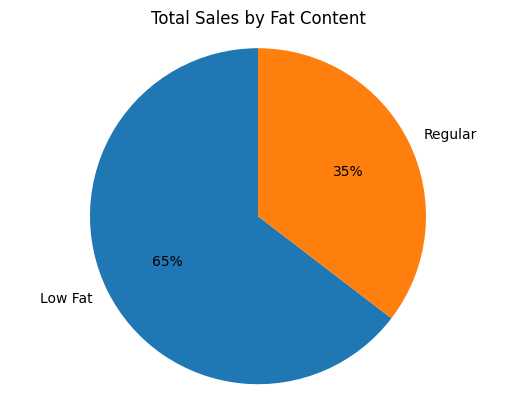

In [49]:
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat_content, labels = sales_by_fat_content.index, autopct='%1.0f%%',startangle=90)
plt.title('Total Sales by Fat Content')
plt.axis('equal')
plt.show()

###**Total Sales by Item Type**

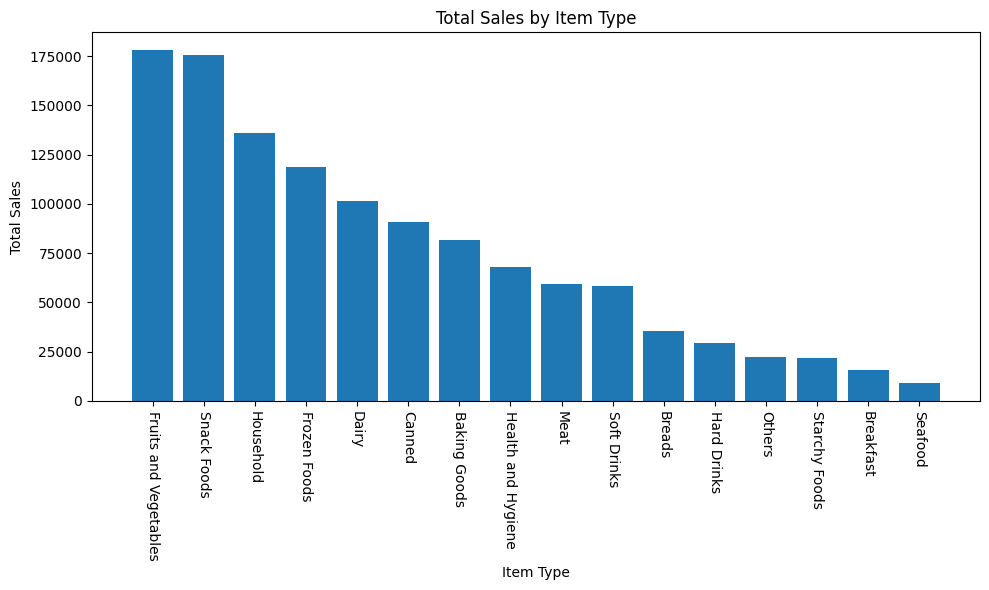

In [73]:
item_size = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(item_size.index, item_size.values)

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=-90)


plt.tight_layout()
plt.show()

###**Fat Content by Outlet for Total Sales**

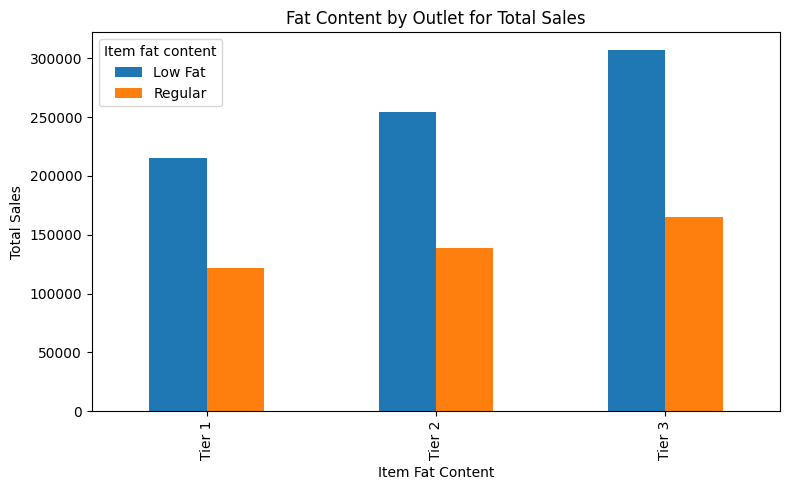

In [85]:
grouped = df.groupby(['Outlet Location Type',"Item Fat Content"])['Sales'].sum().unstack()
grouped = grouped[['Low Fat', 'Regular']]

ax = grouped.plot(kind = 'bar',figsize=(8,5),title='Fat Content by Outlet for Total Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.legend(title='Item fat content')
plt.tight_layout()
plt.show()

###**Total Sales by Outlet Establishment**

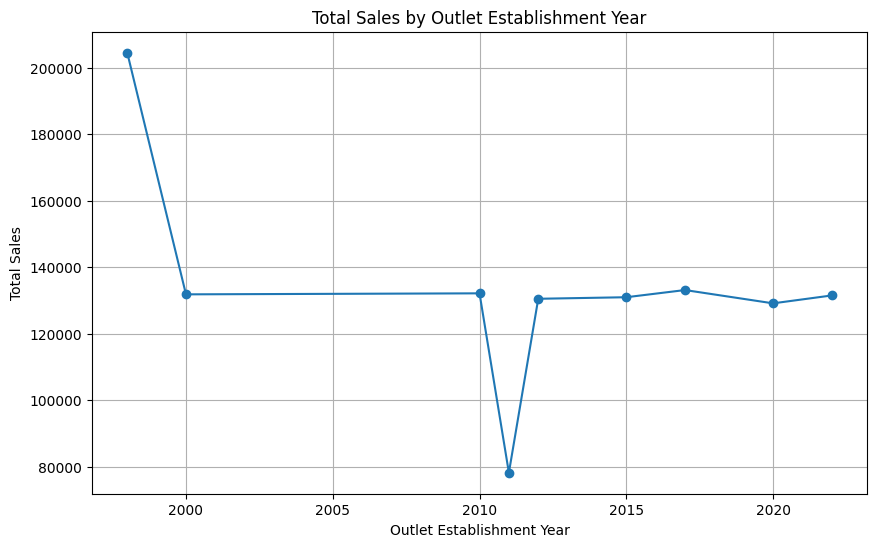

In [96]:
sales_by_year = df.groupby("Outlet Establishment Year")['Sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)

###**Sales by Outlet Size**

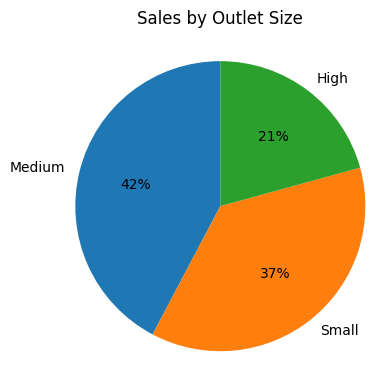

In [102]:
size = df.groupby('Outlet Size')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
plt.pie(size, labels = size.index, autopct='%1.0f%%',startangle=90)
plt.title('Sales by Outlet Size')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**Sales by Outlet Location**

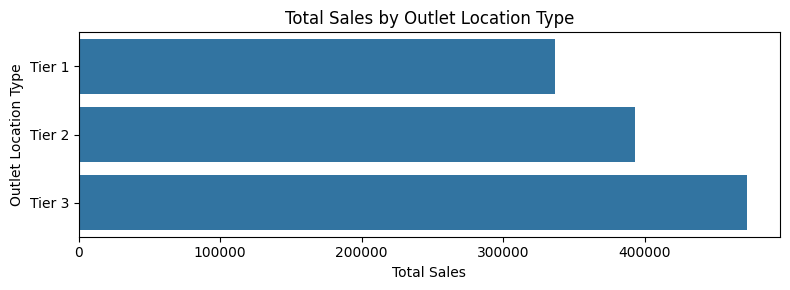

In [116]:
sales_by_location = df.groupby('Outlet Location Type') ['Sales'].sum().reset_index()
sales_by_fat_content = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))

ax =  sns.barplot(x='Sales', y= 'Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel("Total Sales")
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()